In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar o arquivo CSV
file_path = '../../../datasets/b3_dados/processed/acoes_concat.csv'
stock_data = pd.read_csv(file_path)

# Converter a coluna 'Date' para datetime e defini-la como índice
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

1. **Histogramas**

Objetivo: Mostrar a distribuição dos preços de fechamento em um intervalo de valores.

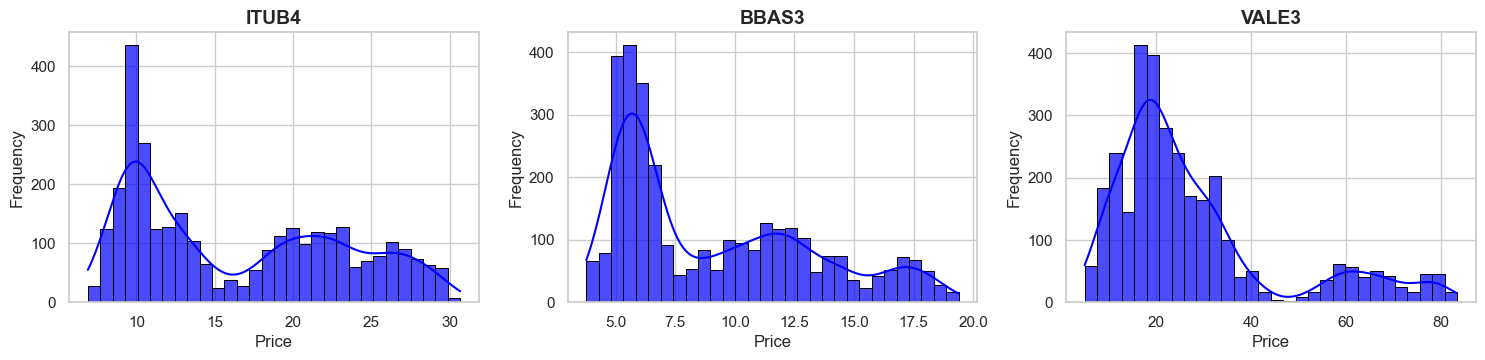

In [3]:

def plot_histograms(data, stocks):
    # Configuração do estilo do Seaborn
    sns.set(style="whitegrid")  # Fundo com grade
    sns.set_palette("husl")  # Paleta de cores mais vibrante
    
    # Criação da figura e dos subplots
    plt.figure(figsize=(20, 10))
    for i, stock in enumerate(stocks, 1):
        plt.subplot(3, 4, i)  # Ajuste o layout conforme o número de ações
        sns.histplot(data[stock], bins=30, kde=True, color='blue', edgecolor='black', alpha=0.7)
        plt.title(f'{stock}', fontsize=14, fontweight='bold')
        plt.xlabel('Price', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
    
    # Ajustes finais
    plt.tight_layout()
    plt.show()

# Exemplo de uso
plot_histograms(stock_data, ['ITUB4', 'BBAS3', 'VALE3'])

**boxplot em relação ao tempo** 

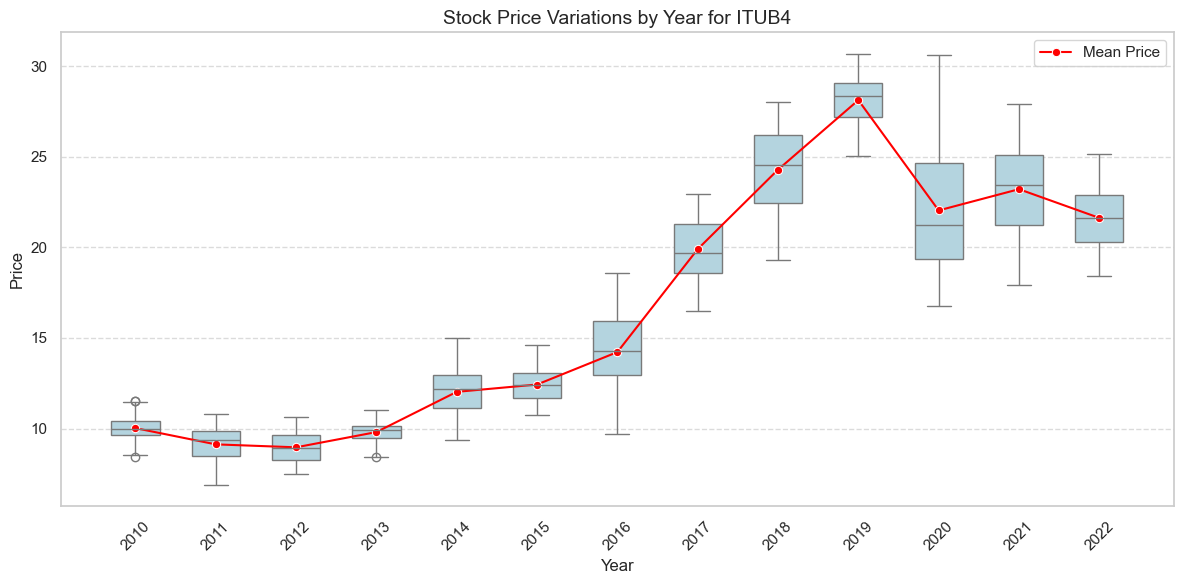

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Função para criar um gráfico com boxplot e linha sobrepostos
def create_seaborn_boxplot_with_line_overlay(data, stock_column, title_prefix="Price Variations"):
    plt.figure(figsize=(12, 6))
    
    # Boxplot
    # Usamos uma posição numérica para o eixo x
    sns.boxplot(data=data, x='Year', y=stock_column, color='lightblue', width=0.6)
    
    # Linha (média anual)
    yearly_mean = data.groupby('Year')[stock_column].mean().reset_index()  # Calcula a média anual
    sns.lineplot(x=np.arange(len(yearly_mean)), y=yearly_mean[stock_column], color='red', marker='o', label='Mean Price')
    
    # Ajusta os rótulos do eixo x
    plt.xticks(np.arange(len(yearly_mean)), yearly_mean['Year'], rotation=45)
    
    # Formatação do gráfico
    plt.title(f'{title_prefix} by Year for {stock_column}', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()  # Mostra a legenda para a linha
    plt.tight_layout()
    plt.show()

# Exemplo: Boxplot e linha sobrepostos para 'ITUB4'
create_seaborn_boxplot_with_line_overlay(stock_data, 'ITUB4', "Stock Price Variations")

**Gráfico de Violino em conjunto com Boxplot**

1. função para plotar o gráfico que será uma junção do boxplot com gráfico violino

In [3]:
# Função para criar gráficos de violino com boxplot
# Recebe os dados, o título do gráfico e o rótulo do eixo y
def plot_violin_boxplot(data, title, ylabel, extra_data=None, extra_title=None):
    """
    Plota gráficos de violino e boxplot combinados para visualizar a distribuição dos dados.
    
    Se um conjunto adicional de dados (`extra_data`) for fornecido, dois gráficos são plotados lado a lado,
    permitindo comparar as distribuições de diferentes períodos ou conjuntos de dados.

    Args:
        data (pd.DataFrame or pd.Series): O conjunto de dados principal a ser plotado.
        title (str): O título do gráfico ou do primeiro gráfico (se `extra_data` for fornecido).
        ylabel (str): O rótulo do eixo Y.
        extra_data (pd.DataFrame or pd.Series, optional): Um segundo conjunto de dados para comparação.
            Default é None.
        extra_title (str, optional): O título do segundo gráfico, se `extra_data` for fornecido.
            Default é None, usando um título genérico derivado de `title`.
    
    Returns:
        None: Exibe o(s) gráfico(s) gerado(s).
    """
    if extra_data is not None:
        # Configurar dois gráficos lado a lado
        fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
        
        # Gráfico para o conjunto de dados principal
        sns.violinplot(data=data, inner=None, linewidth=1, ax=axes[0])  # Gráfico de violino
        sns.boxplot(data=data, whis=1.5, width=0.2, linewidth=1, color='lightgrey', ax=axes[0])  # Boxplot
        axes[0].set_title(title, fontsize=16)  # Título do primeiro gráfico
        axes[0].set_ylabel(ylabel, fontsize=12)  # Rótulo do eixo Y
        axes[0].set_xlabel('Stocks', fontsize=12)  # Rótulo do eixo X
        axes[0].tick_params(axis='x', rotation=45)  # Rotação dos rótulos do eixo X
        axes[0].grid(axis='y', linestyle='--', alpha=0.7)  # Grade no eixo Y
        
        # Gráfico para o conjunto de dados adicional
        sns.violinplot(data=extra_data, inner=None, linewidth=1, ax=axes[1])  # Gráfico de violino
        sns.boxplot(data=extra_data, whis=1.5, width=0.2, linewidth=1, color='lightgrey', ax=axes[1])  # Boxplot
        # Definir título do segundo gráfico
        axes[1].set_title(extra_title if extra_title else f'{title} (Dataset 2)', fontsize=16)
        axes[1].set_xlabel('Stocks', fontsize=12)  # Rótulo do eixo X
        axes[1].tick_params(axis='x', rotation=45)  # Rotação dos rótulos do eixo X
        axes[1].grid(axis='y', linestyle='--', alpha=0.7)  # Grade no eixo Y
        
        plt.tight_layout()  # Ajustar o layout para evitar sobreposição
    else:
        # Configuração para um único gráfico
        plt.figure(figsize=(12, 8))  # Tamanho da figura
        sns.violinplot(data=data, inner=None, linewidth=1)  # Gráfico de violino
        sns.boxplot(data=data, whis=1.5, width=0.2, linewidth=1, color='lightgrey')  # Boxplot
        plt.title(title, fontsize=16)  # Título do gráfico
        plt.ylabel(ylabel, fontsize=12)  # Rótulo do eixo Y
        plt.xlabel('Stocks', fontsize=12)  # Rótulo do eixo X
        plt.xticks(rotation=45)  # Rotação dos rótulos do eixo X
        plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grade no eixo Y
        plt.tight_layout()  # Ajustar o layout
    
    # Exibir o(s) gráfico(s)
    plt.show()


2. Nosso primeiro gráfico será os dados diários de fechamento das ações

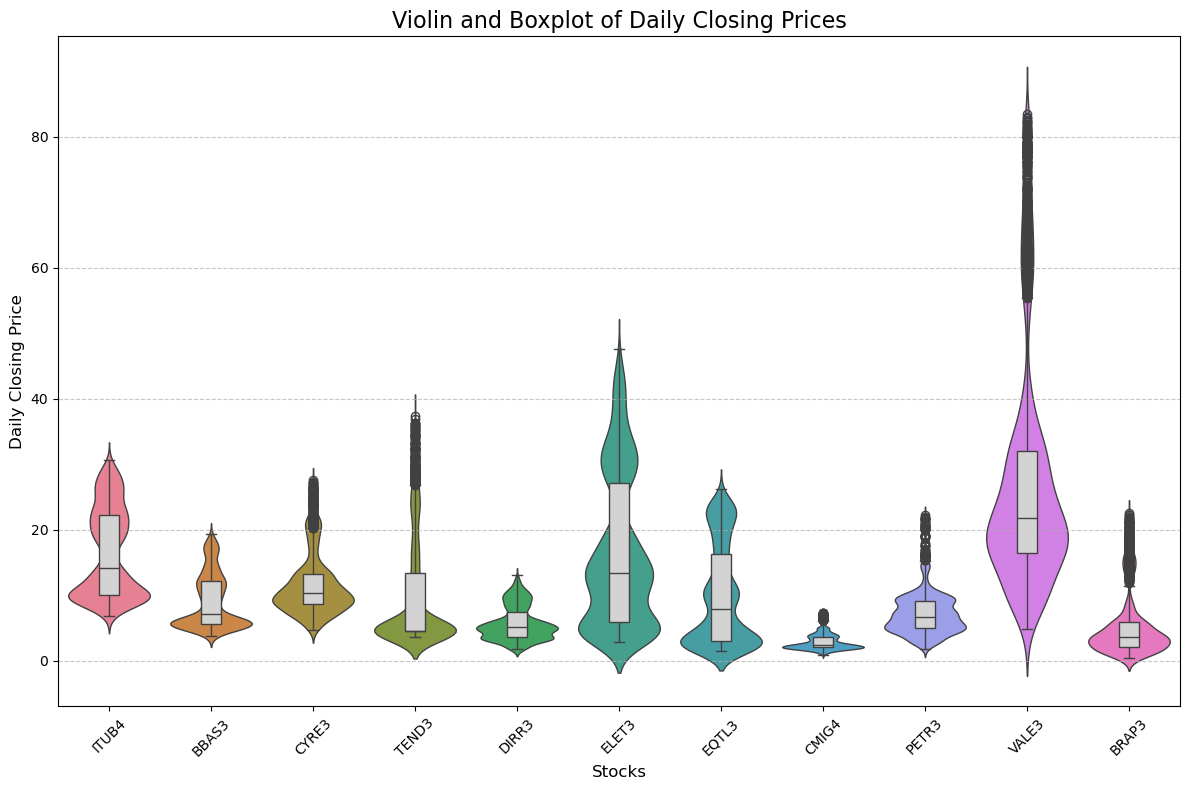

In [4]:
# Gerar gráficos para granularidade diária
plot_violin_boxplot(stock_data,
                    "Violin and Boxplot of Daily Closing Prices",
                    "Daily Closing Price")

3. Alteramos a granularidade para dados anuais

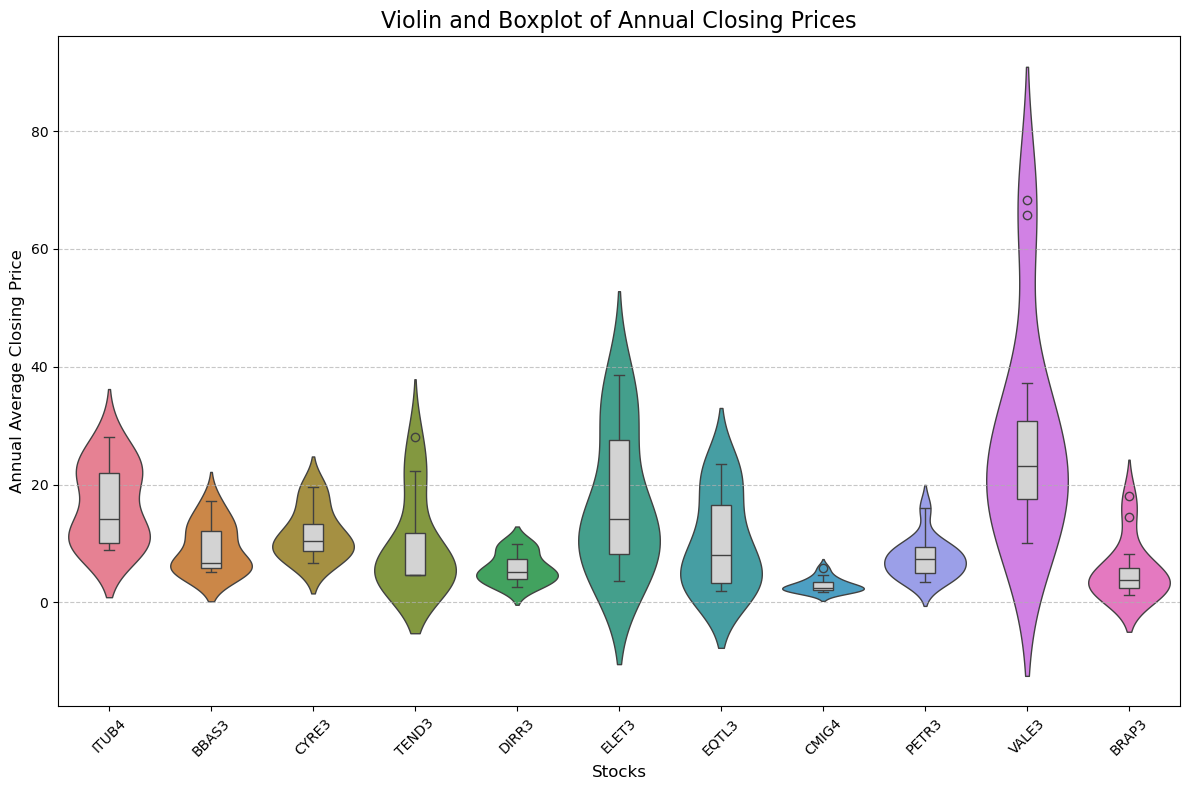

In [5]:
# Alterar granularidade para anual (média dos preços de fechamento)
acoes_annual = stock_data.resample('YE').mean()
plot_violin_boxplot(acoes_annual,
                    "Violin and Boxplot of Annual Closing Prices",
                    "Annual Average Closing Price")

4. Agora a granularidade será mensal e depois trimestral

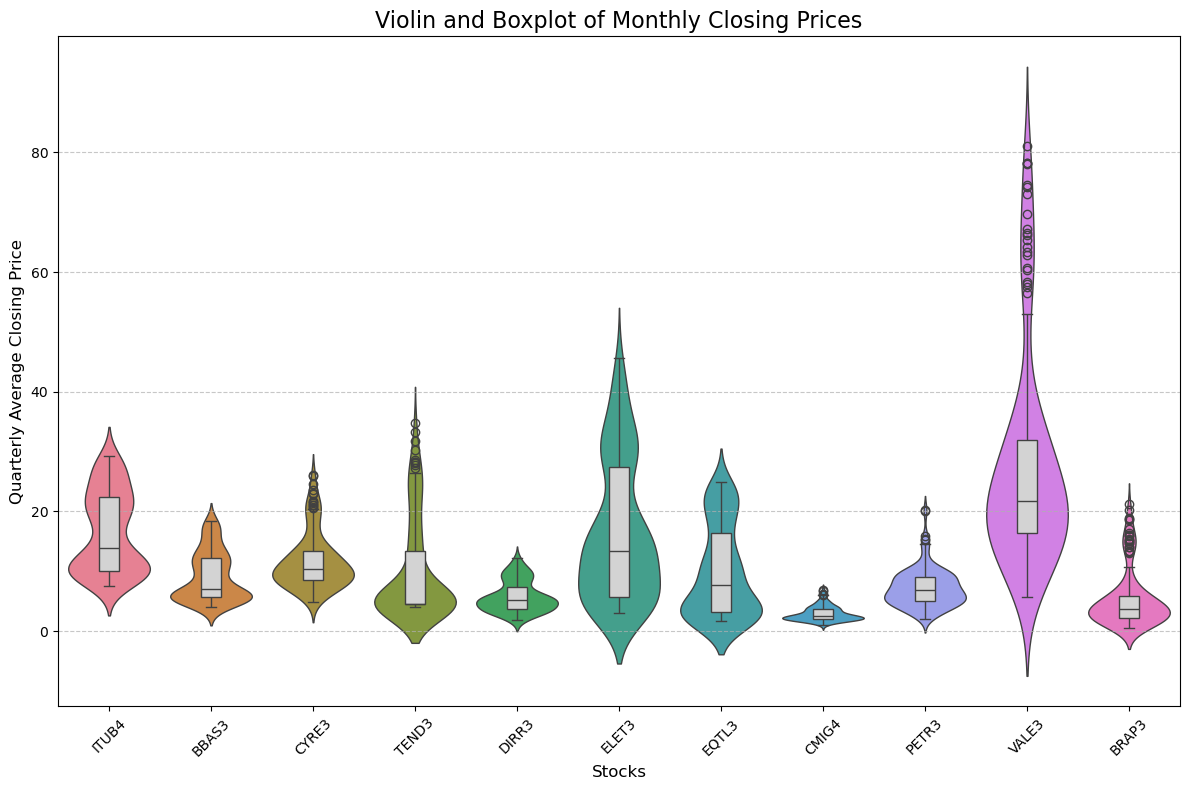

In [4]:
# Alterar granularidade para mensal (média dos preços de fechamento)
acoes_monthly = stock_data.resample('ME').mean()
plot_violin_boxplot(acoes_monthly,
                    "Violin and Boxplot of Monthly Closing Prices",
                    "Quarterly Average Closing Price")

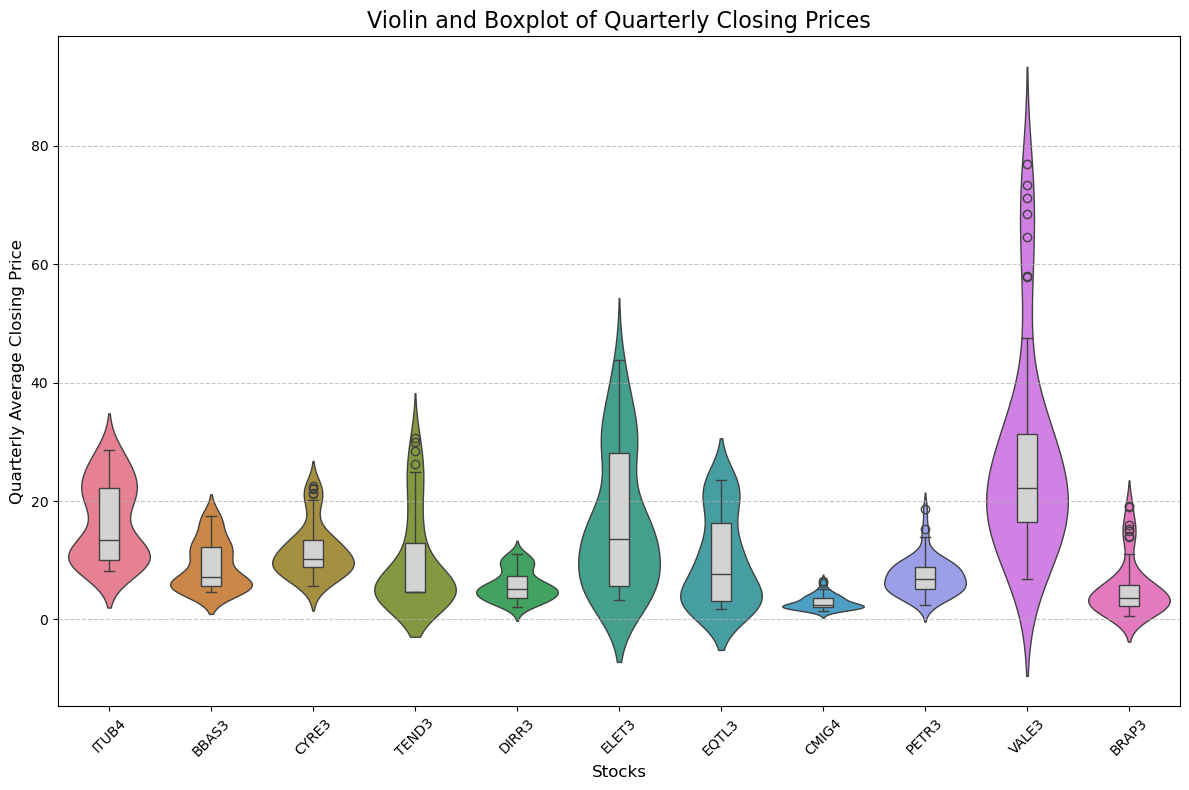

In [7]:
# Alterar granularidade para trimestral (média dos preços de fechamento)
acoes_quarterly = stock_data.resample('QE').mean()
plot_violin_boxplot(acoes_quarterly,
                    "Violin and Boxplot of Quarterly Closing Prices",
                    "Quarterly Average Closing Price")

5. Vamos pegar os dados a partir de 2019 (nossos dados originais iniciam em janeiro de 2010 e vão até setembro de 2022). Em seguida, vamos pegar granularidades diferentes: diária, mensal, triemstral e anual. Depois vamos comparar com os dados de anos anteriores.

In [8]:
# Filtrar os dados para a partir de 2019
acoes_2019 = stock_data[stock_data.index.year >= 2019]
acoes_before_2019 = stock_data[stock_data.index.year < 2019]

# Gerar gráficos para granularidades diárias, mensais, trimestrais e anuais (dados a partir de 2019)
acoes_daily_2019 = acoes_2019
acoes_before_2019_daily = acoes_before_2019 
acoes_monthly_2019 = acoes_2019.resample('ME').mean()  # Mensal
acoes_before_2019_monthly = acoes_before_2019.resample('ME').mean()  # Mensal
acoes_quarterly_2019 = acoes_2019.resample('QE').mean()  # Trimestral
acoes_before_2019_quarterly = acoes_before_2019.resample('QE').mean()  # Trimestral
acoes_annual_2019 = acoes_2019.resample('YE').mean()  # Anual
acoes_before_2019_annual = acoes_before_2019.resample('YE').mean()  # Anual

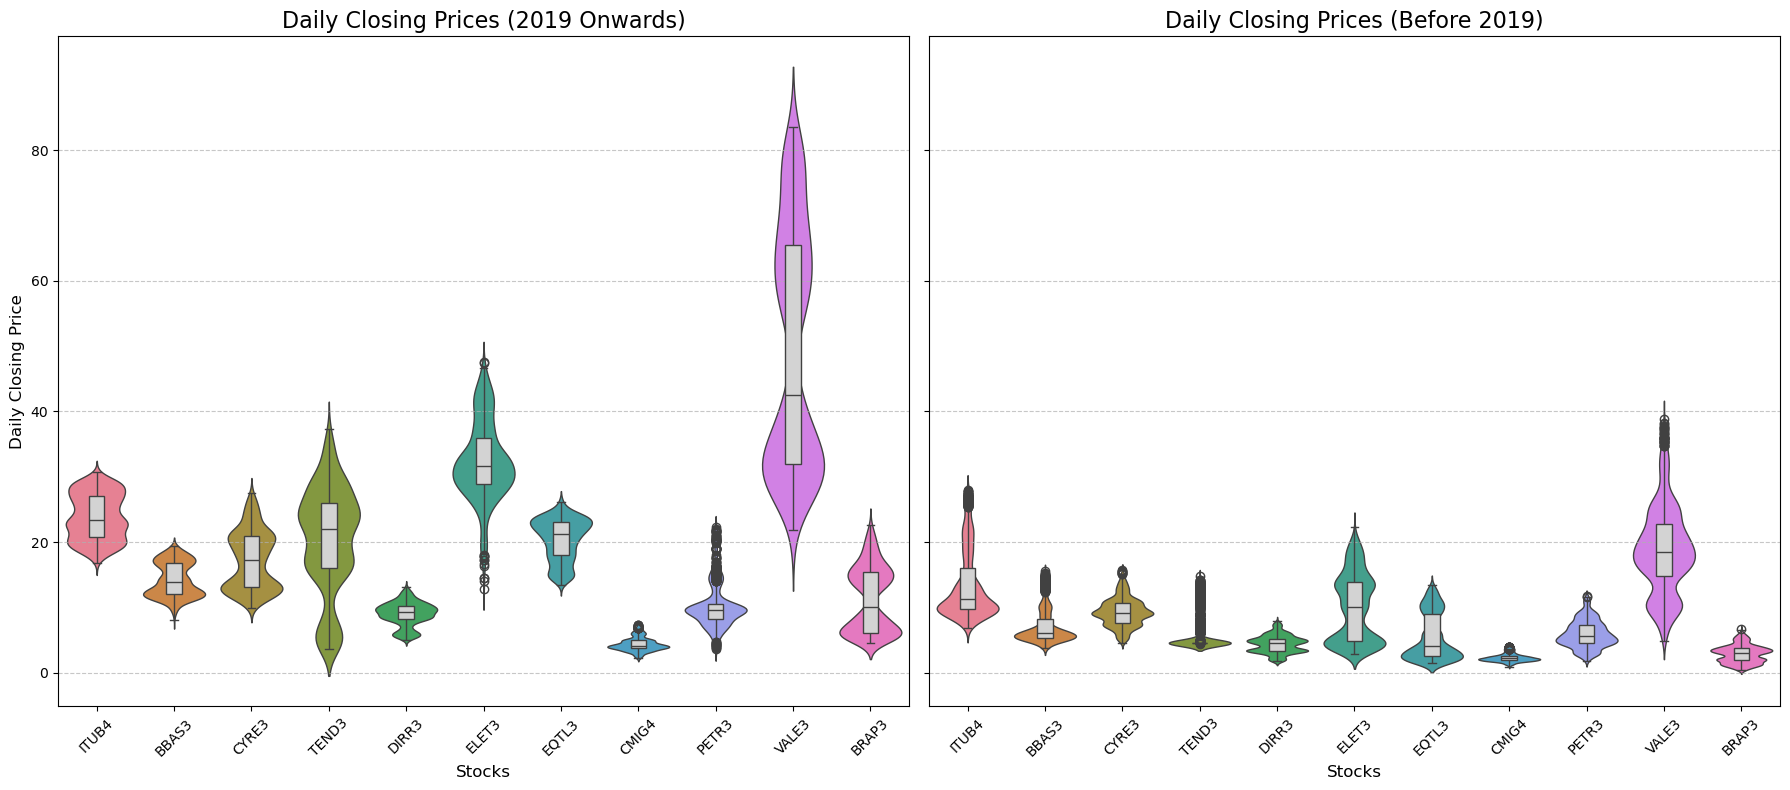

In [9]:
#diários
plot_violin_boxplot(acoes_daily_2019,
                    "Daily Closing Prices (2019 Onwards)",
                    "Daily Closing Price",
                    acoes_before_2019_daily,
                    extra_title="Daily Closing Prices (Before 2019)")


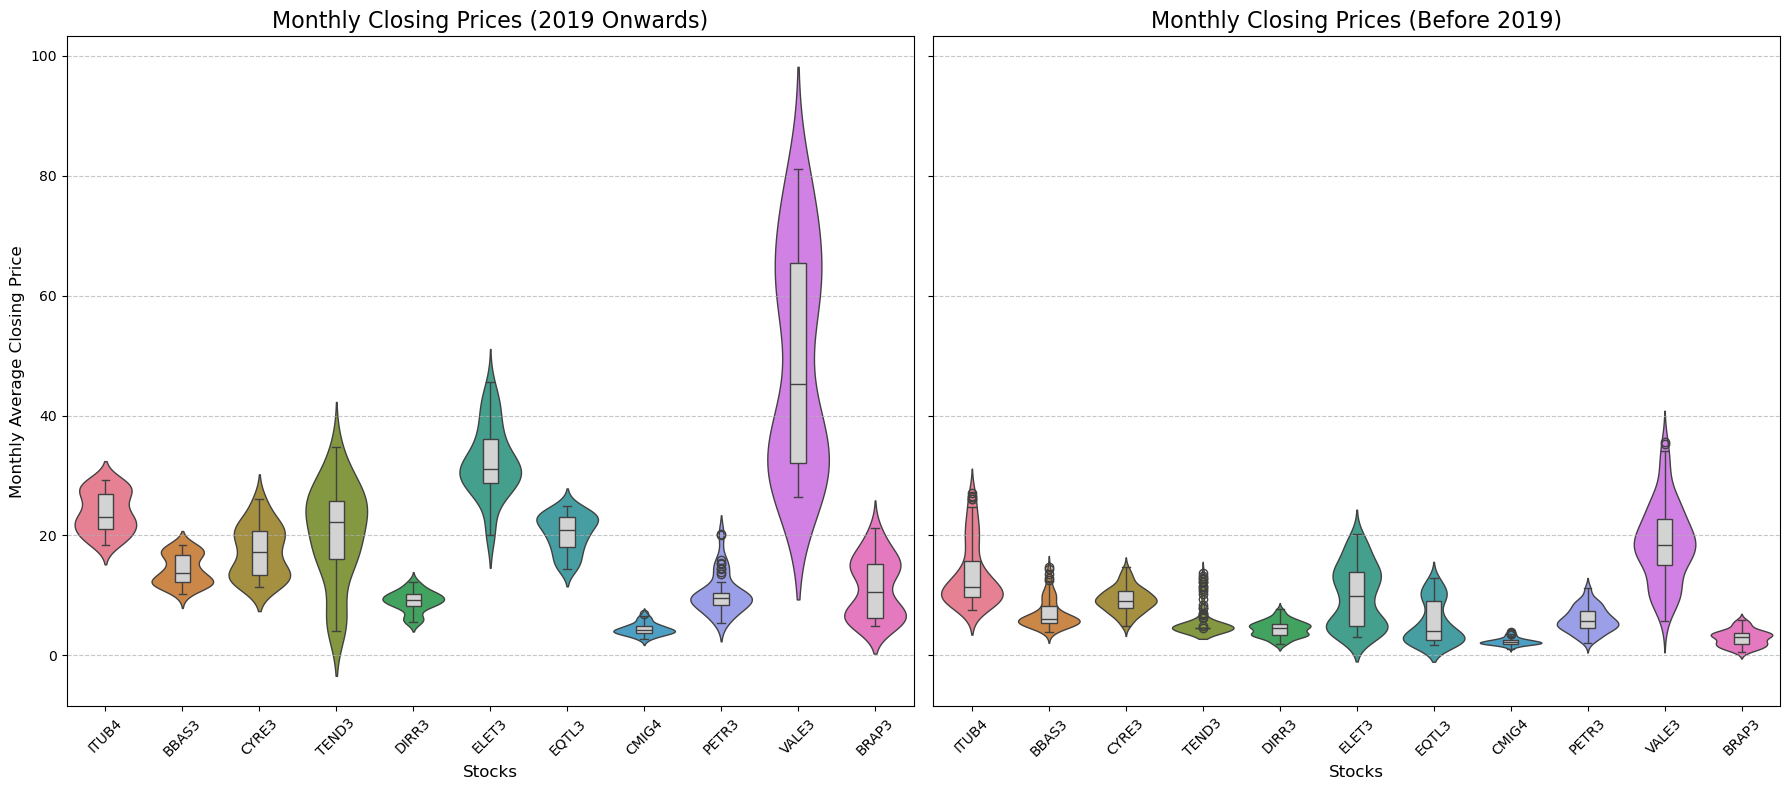

In [10]:
#mensal
plot_violin_boxplot(acoes_monthly_2019,
                    "Monthly Closing Prices (2019 Onwards)",
                    "Monthly Average Closing Price",
                    acoes_before_2019_monthly,
                    extra_title="Monthly Closing Prices (Before 2019)")

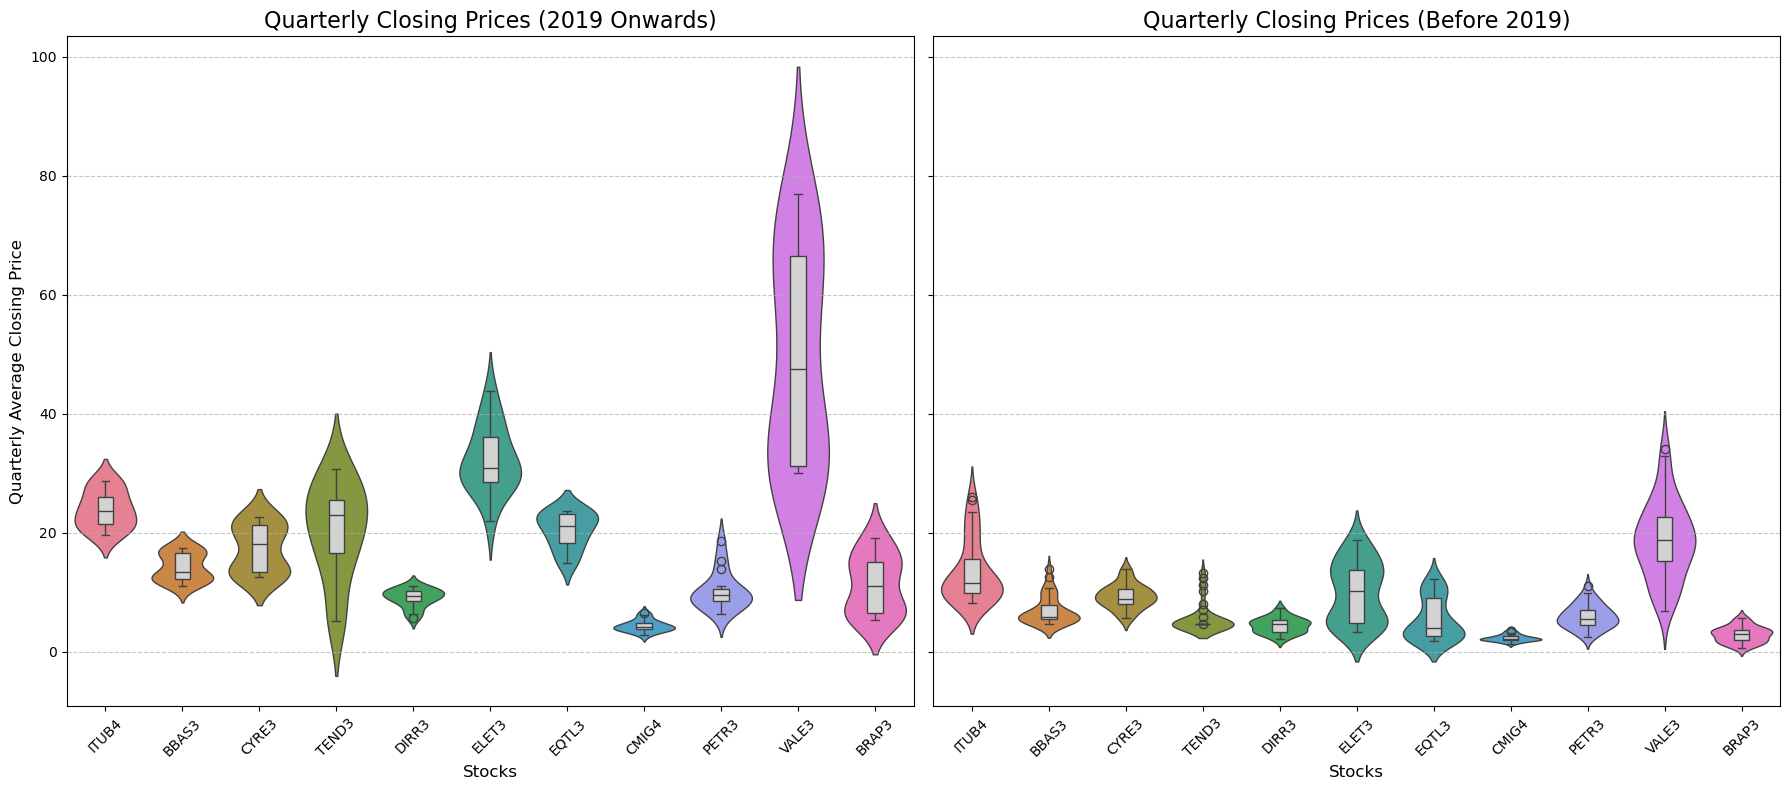

In [11]:
#trimestral
plot_violin_boxplot(acoes_quarterly_2019,
                    "Quarterly Closing Prices (2019 Onwards)",
                    "Quarterly Average Closing Price",
                    acoes_before_2019_quarterly,
                    extra_title="Quarterly Closing Prices (Before 2019)")


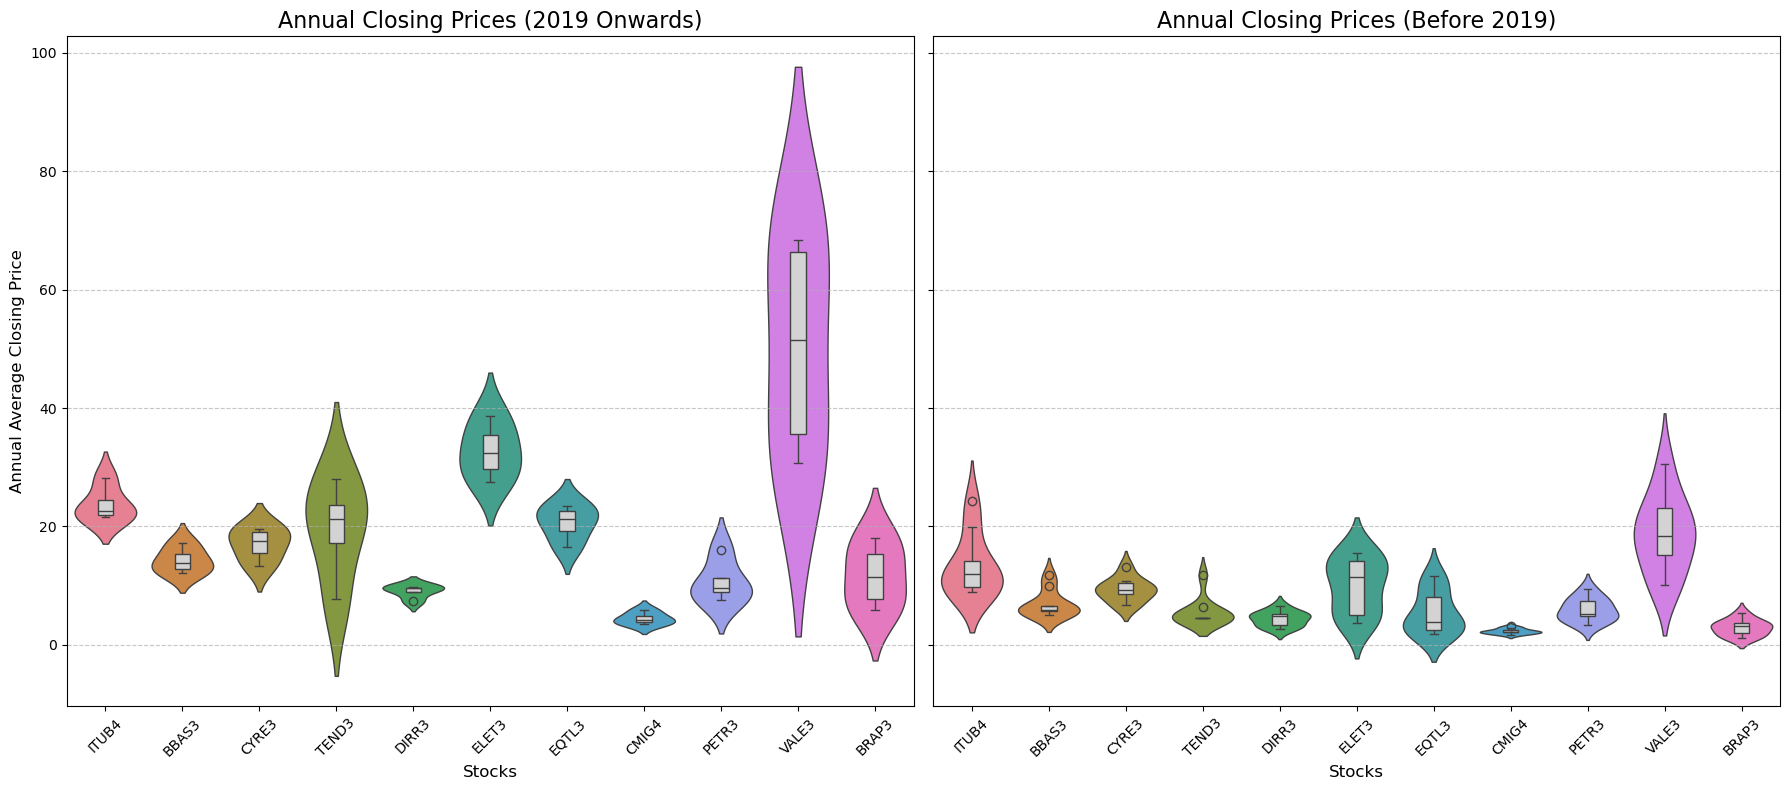

In [12]:
#anual
plot_violin_boxplot(acoes_annual_2019,
                    "Annual Closing Prices (2019 Onwards)",
                    "Annual Average Closing Price",
                    acoes_before_2019_annual,
                    extra_title="Annual Closing Prices (Before 2019)")